a)

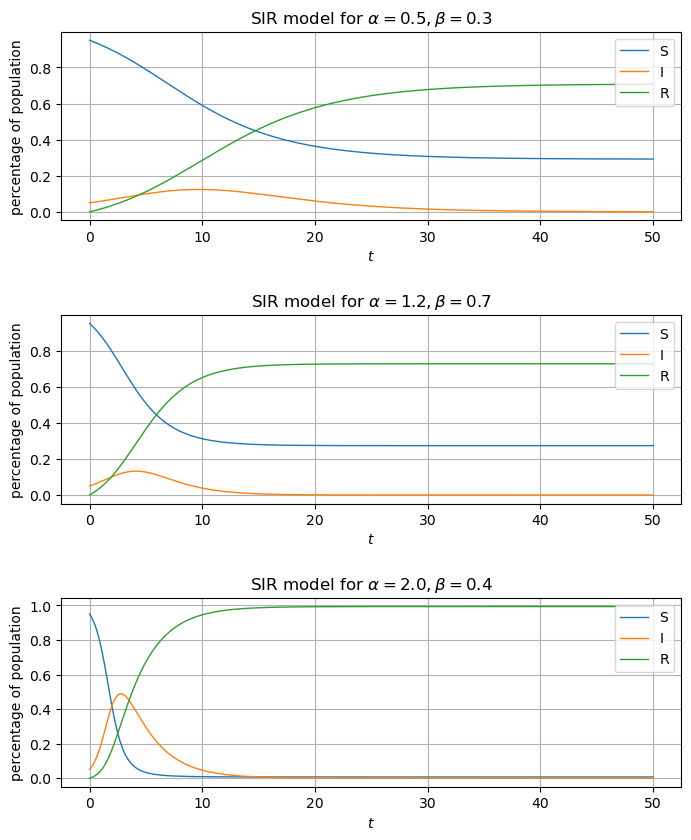

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


##constants
alph = [0.5,1.2,2.0]
bet = [0.3,0.7,0.4]

def sir(y,t):
    dx = -alpha*y[0]*y[1]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1]
    return [dx,dy,dz]

y0 = [0.95,0.05,0]
t = np.linspace(0,50,1000)


fig, axs = plt.subplots(3, figsize=(8,10), dpi = 100)
plt.subplots_adjust(hspace = 0.5)



for i in range(3):
    alpha = alph[i]
    beta = bet[i]
    y = odeint(sir, y0, t).T
    axs[i].grid()
    axs[i].set_ylabel("percentage of population")
    axs[i].set_xlabel("$t$")
    axs[i].plot(t, y[0], lw = 1, label = 'S')
    axs[i].plot(t, y[1], lw = 1, label = 'I')
    axs[i].plot(t, y[2], lw = 1, label = 'R')
    axs[i].legend(loc = "upper right")
    axs[i].set_title(r"SIR model for $\alpha={}, \beta = {}$".format(alpha,beta))





b)

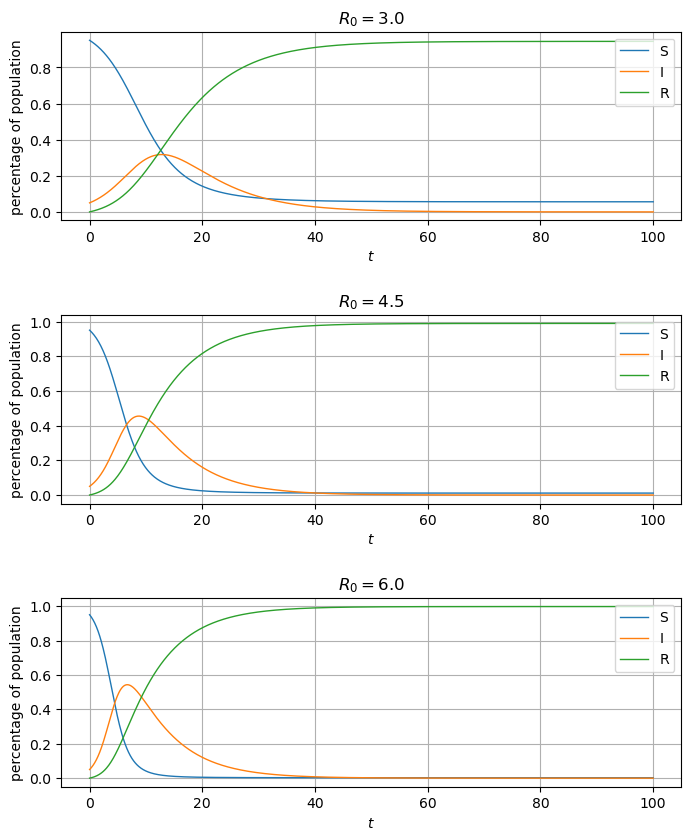

In [2]:
#keep beta fixed and vary alpha
beta = 0.14
R0 = np.array([3,4.5,6])
y0 = [0.95,0.05,0]
t = np.linspace(0,100,1000)


def sir(y,t):

    dx = -alpha*y[0]*y[1]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1]
    return [dx,dy,dz]

fig, axs = plt.subplots(3, figsize=(8,10), dpi = 100)
plt.subplots_adjust(hspace = 0.5)



for i in range(3):
    alpha = beta * R0[i]
    y = odeint(sir, y0, t).T
    axs[i].grid()
    axs[i].set_ylabel("percentage of population")
    axs[i].set_xlabel("$t$")
    axs[i].plot(t, y[0], lw = 1, label = 'S')
    axs[i].plot(t, y[1], lw = 1, label = 'I')
    axs[i].plot(t, y[2], lw = 1, label = 'R')
    axs[i].legend(loc = "upper right")
    axs[i].set_title("$R_0={}$".format(R0[i]))
    

The plots above show that for increasing $R_0$, the infected curve gets much steeper in the beginning and also the maximum percentage of infected people increases with $R_0$, leading to a higher number of people infected at the same time. After reaching the maximum, the infected fraction decreases very quickly, especially for large values of $R_0$. So $R_0$ determines how intense the pandemic gets, but also how long it takes to reach herd immunity.

c)

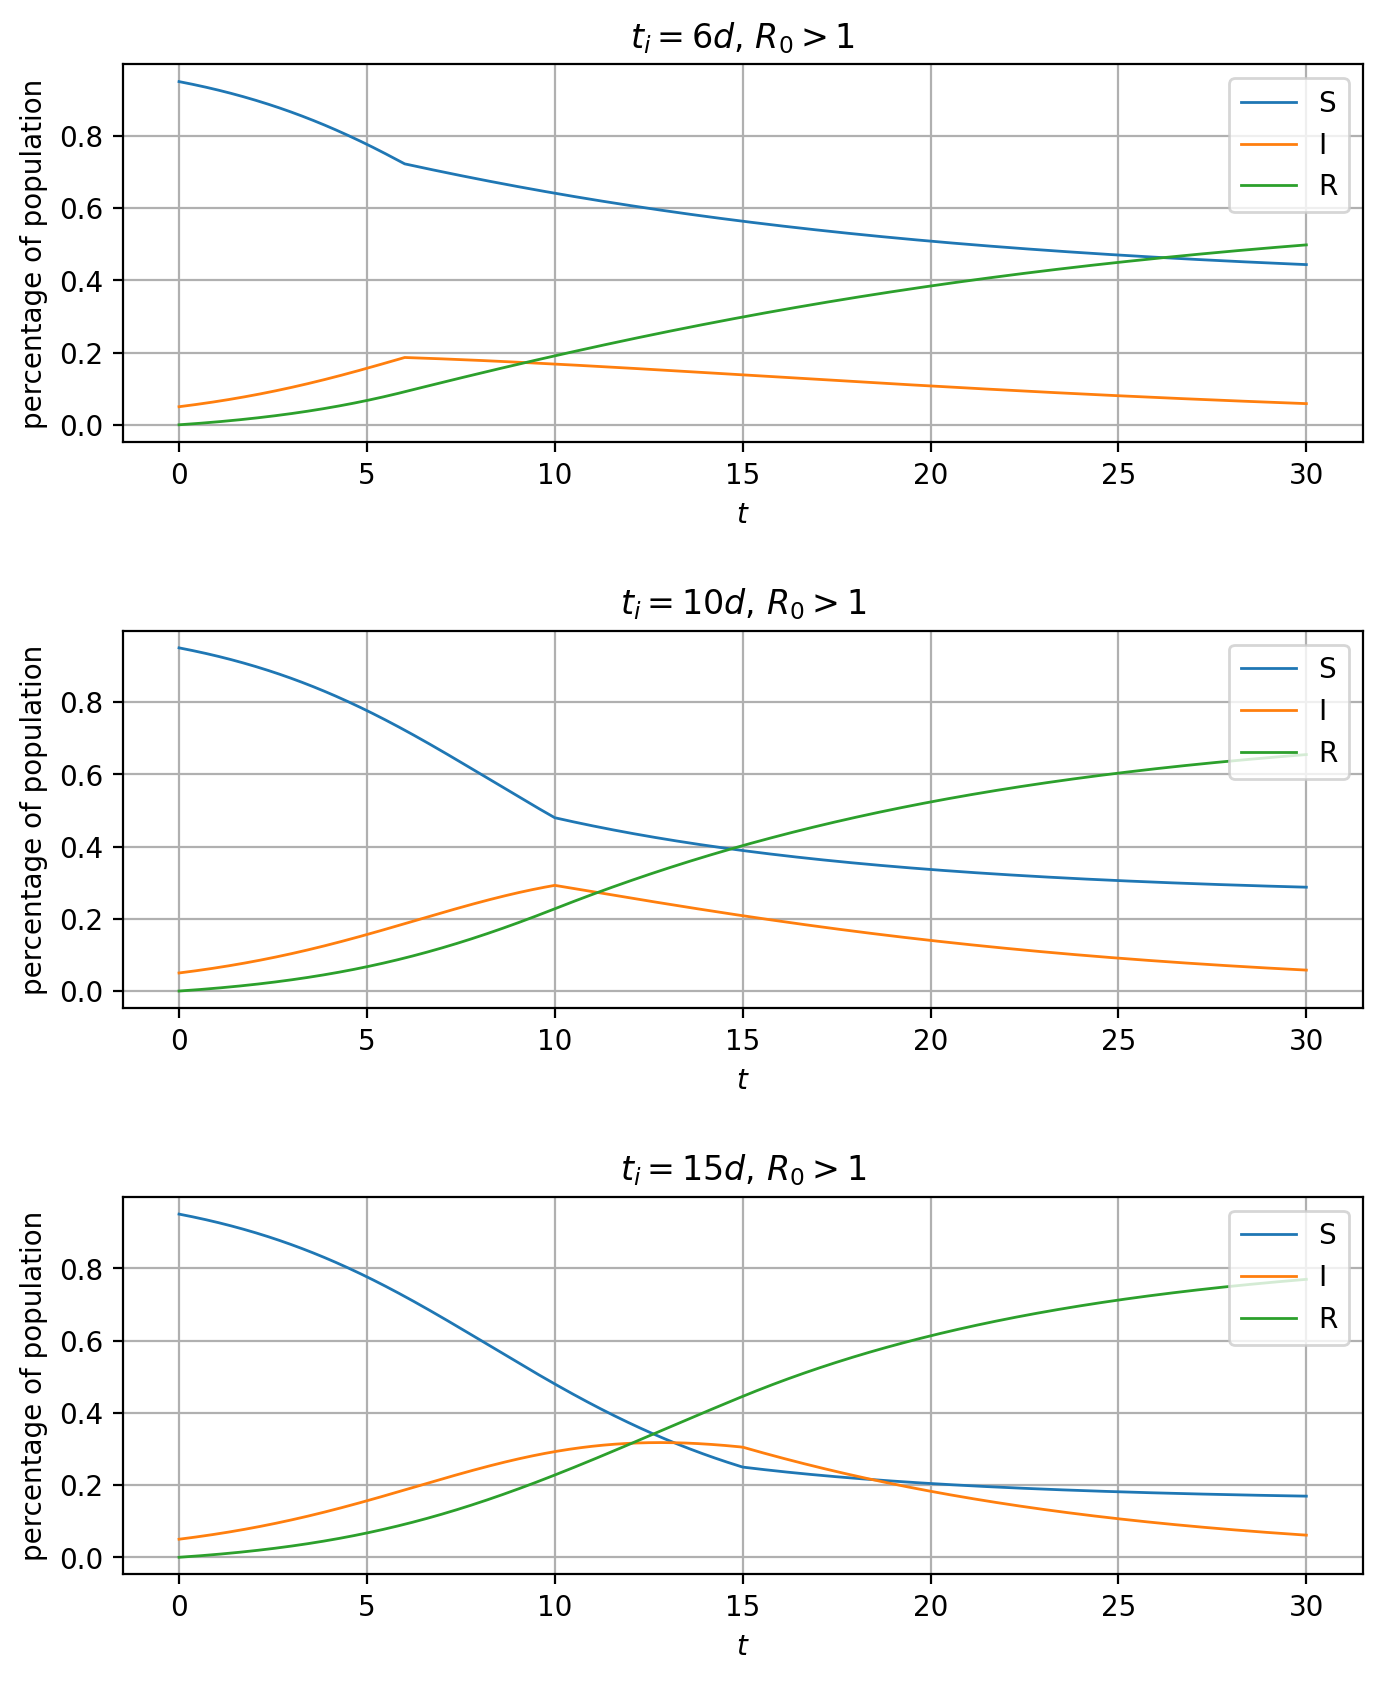

In [44]:
beta = 0.14
##first consider intervention that keeps R0 above 1, eg alpha > 0.14
y0 = [0.95,0.05,0]
t = np.linspace(0,30,1000)
inter = [6,10,15] ##times of intervention

def sir(y,t):
    if(t < tint):
        alpha = 3 * beta
    else:
        alpha = 1.2 * beta
    dx = -alpha*y[0]*y[1]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1]
    return [dx,dy,dz]


fig, axs = plt.subplots(3, figsize=(8,10), dpi = 200)
plt.subplots_adjust(hspace = 0.5)



for i in range(3):
    tint = inter[i]
    y = odeint(sir, y0, t).T
    axs[i].grid()
    axs[i].set_ylabel("percentage of population")
    axs[i].set_xlabel("$t$")
    axs[i].plot(t, y[0], lw = 1, label = 'S')
    axs[i].plot(t, y[1], lw = 1, label = 'I')
    axs[i].plot(t, y[2], lw = 1, label = 'R')
    axs[i].legend(loc = "upper right")
    axs[i].set_title("$t_i={}d$, $R_0>1$".format(tint))

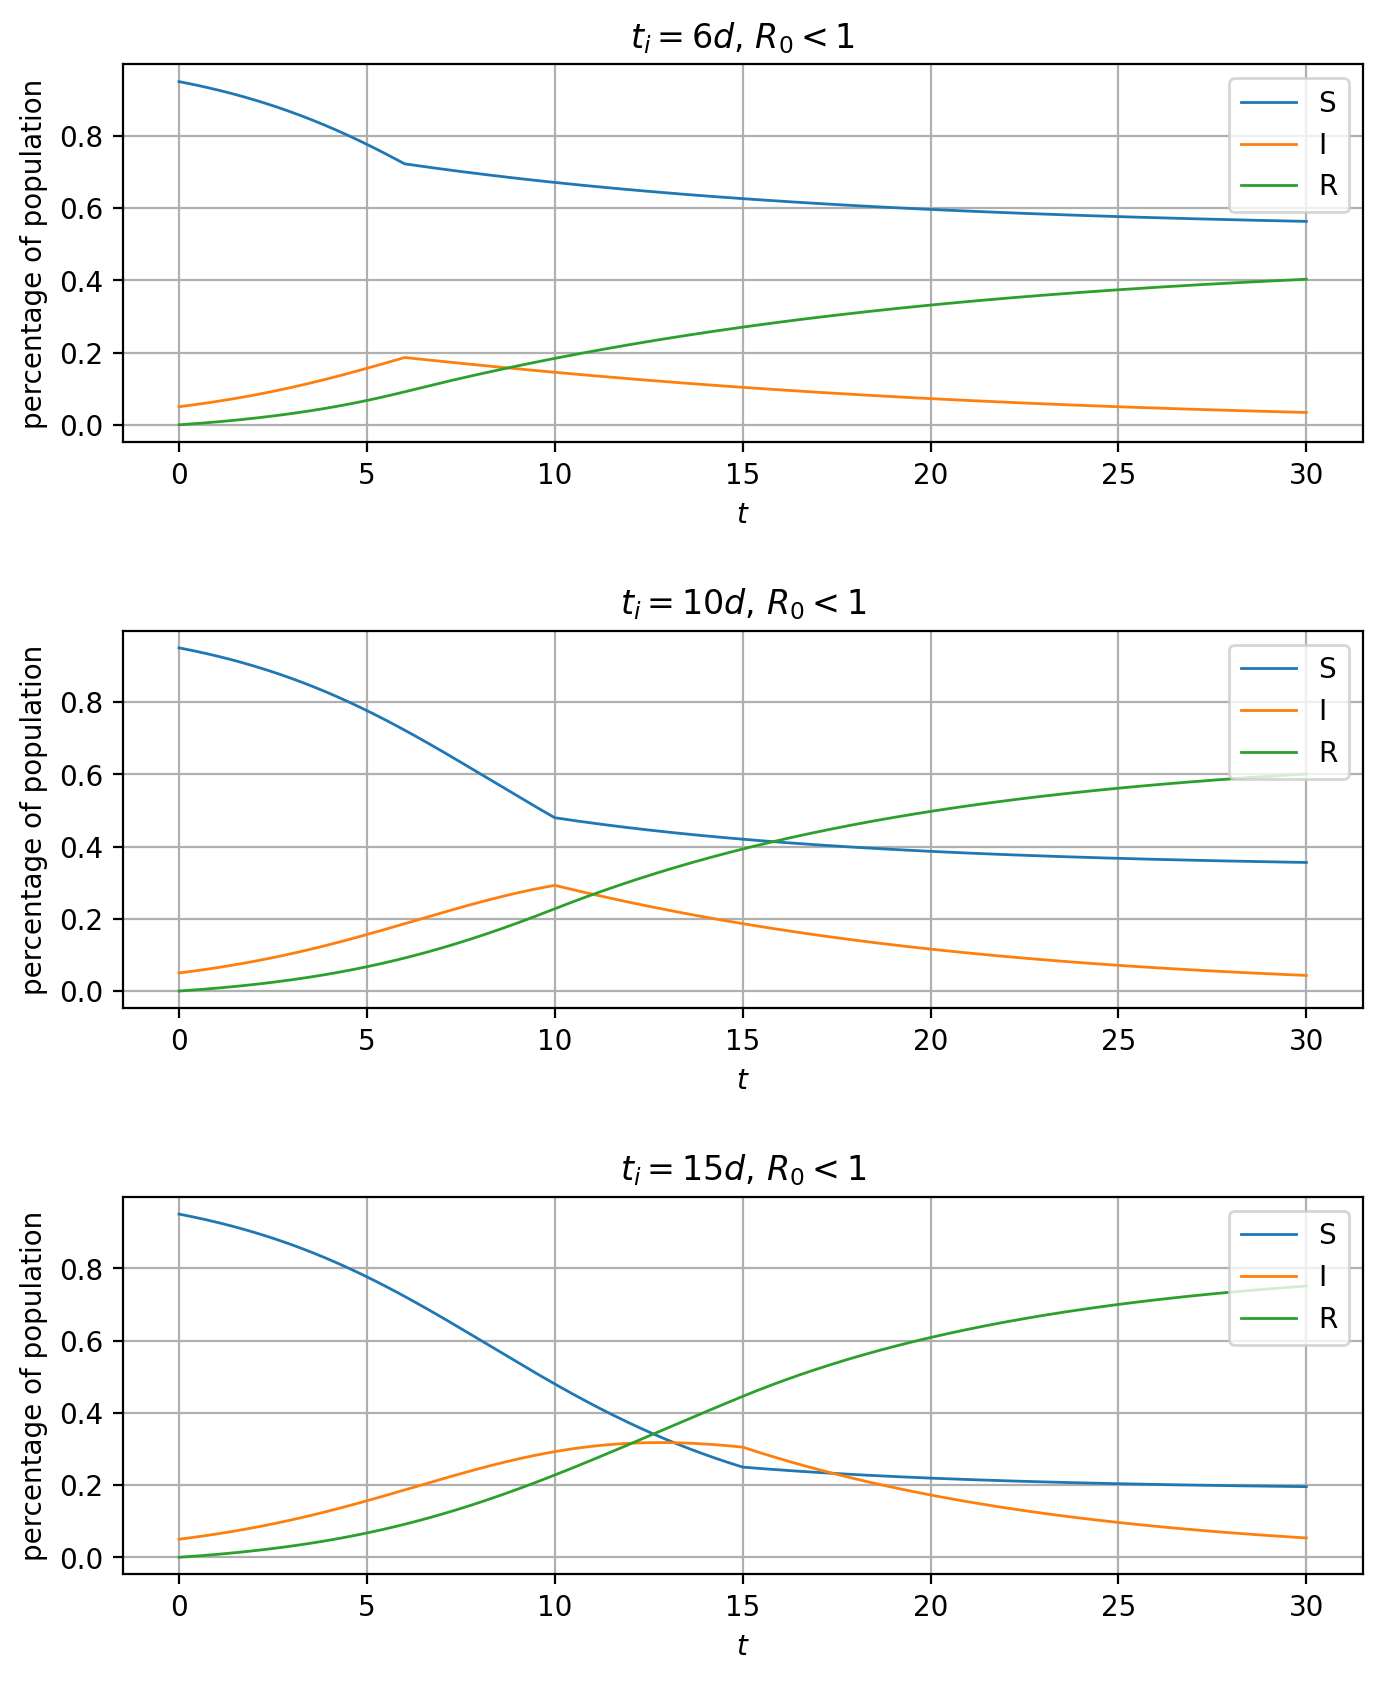

In [45]:
beta = 0.14
##now consider intervention that decreases R0 below 1, eg alpha < 0.14
y0 = [0.95,0.05,0]
t = np.linspace(0,30,1000)
inter = [6,10,15] ##times of intervention

def sir(y,t):
    if(t < tint):
        alpha = 3 * beta
    else:
        alpha = 0.8 * beta
    dx = -alpha*y[0]*y[1]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1]
    return [dx,dy,dz]


fig, axs = plt.subplots(3, figsize=(8,10), dpi = 200)
plt.subplots_adjust(hspace = 0.5)



for i in range(3):
    tint = inter[i]
    y = odeint(sir, y0, t).T
    axs[i].grid()
    axs[i].set_ylabel("percentage of population")
    axs[i].set_xlabel("$t$")
    axs[i].plot(t, y[0], lw = 1, label = 'S')
    axs[i].plot(t, y[1], lw = 1, label = 'I')
    axs[i].plot(t, y[2], lw = 1, label = 'R')
    axs[i].legend(loc = "upper right")
    axs[i].set_title("$t_i={}d$, $R_0<1$".format(tint))

d)

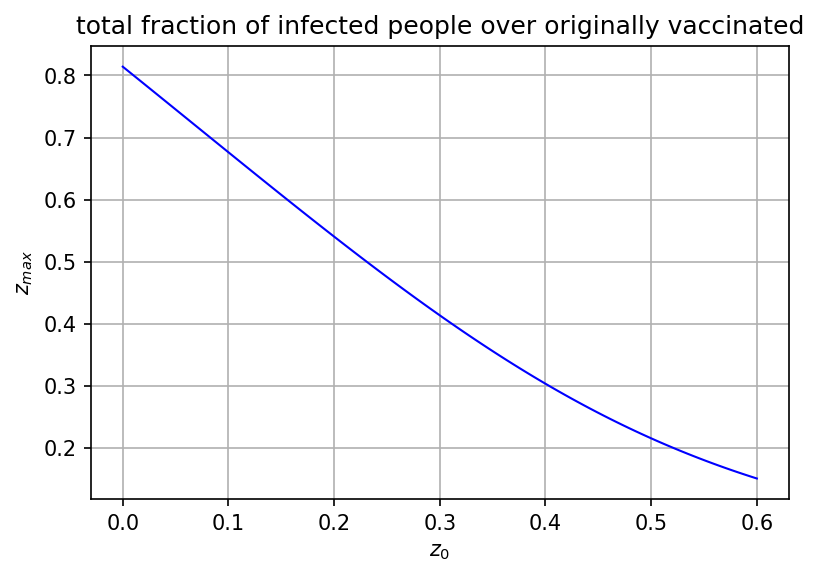

In [67]:
##first consider the simple case that vaccinations only happen before the epidemic
beta = 0.14
alpha = 2
tmax = 100 ##time after which we assume convergence
num = 100 ##number of runs
t = np.linspace(0,tmax,1000)
y0 = 0.05  #fraction of people originally infected
z0 = np.linspace(0,0.6,num) ##fraction of people originally vaccinated
zmax = np.array([]) ##number of recovered people after the epidemic

for i in range(num):
    x0 = 1-y0-z0[i]
    init = [x0,y0,z0[i]] ##initial values
    y = odeint(sir, init, t).T
    zmax = np.append(zmax,y[2,-1]-z0[i]) ##people in the R group minus the originally vaccinated ones give the total fraction of people that were infected

##plot function
plt.figure(dpi=150)
plt.grid()
plt.title("total fraction of infected people over originally vaccinated")
plt.xlabel("$z_0$")
plt.ylabel("$z_{max}$")
plt.plot(z0,zmax,lw=1,color = 'b')


One can see that for $z_0<0.3$, the total fraction of people that were infected decreases linearly with the fraction of originally vaccinated people. After that point, the decrease slows down. To keep the recovered fraction below 20%, more than 50% should be vaccinated.

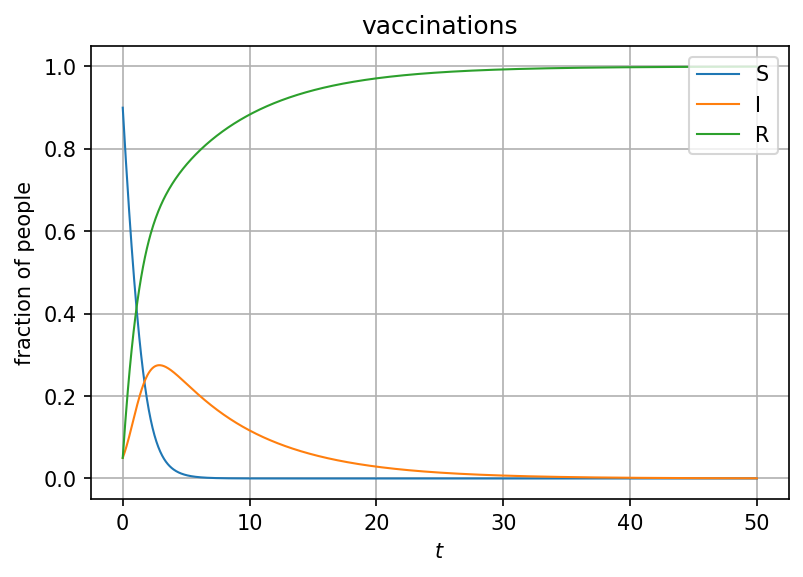

In [82]:
##now we assume that the fraction of people vaccinated grows linearly 
##vaccination means switching from S to R inmediately
beta = 0.14
alpha = 2
vacc = 0.5 ##vaccination rate
t = np.linspace(0,50,1000)
y0 = 0.05  #fraction of people originally infected
z0 = 0.05 ##fraction of people originally vaccinated
x0 = 1-y0-z0 ##fraction of people in S group

def sir(y,t):
    dx = -alpha*y[0]*y[1] - vacc * y[0]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1] + vacc * y[0]
    return [dx,dy,dz]

y = odeint(sir, [x0,y0,z0], t).T

##plot function
plt.figure(dpi=150)
plt.grid()
plt.title("vaccinations")
plt.xlabel("$t$")
plt.ylabel("fraction of people")
plt.plot(t, y[0], lw = 1, label = 'S')
plt.plot(t, y[1], lw = 1, label = 'I')
plt.plot(t, y[2], lw = 1, label = 'R')
plt.legend(loc=1)
